In [2]:
import numpy as np
from matplotlib import pyplot as plt

freq = 2.5 #input('Frequency [GHz]: ')
elec_l = 90 #input('Electrical Length: ')
#z0 = input('Characteristic Impedance: ')
h = 62 #input('Height of Dielectric Substrate [mil]: ')
eps_r = 4.4 #input('Relative Electrical Permittivity: ')

freq = float(freq)*1e9
elec_l = float(elec_l)/360.0
#z0 = float(z0)
h = float(h)
eps_r = float(eps_r)

hmm = 62*0.0254

c = 3e8
lam = c/freq
#assume a 0.7 mil thick conducting layer
t = 0.7
tmm = 0.7*0.0254

zS = 50.0
zL = 100.0

#epsEff = (eps_r+1)/2 + (eps_r-1)/2 * (1 + 12*hmm/2.99067)**(-0.5)

#print(epsEff)

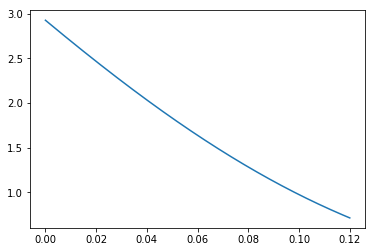

In [4]:
L = lam
z = np.linspace(0,L,1000)
#print(zL/zS)
p = 2*np.pi*(z-L/2)/2
lnZ_ = (z/L) * np.log(zL/zS) #another versino: np.log(zL)/(2*np.pi)*(p+np.pi+0.632*np.sin(p)-0.0653*np.sin(3*p))

z0 = zS * np.exp(lnZ_)

#print(z0)

# this equation will be used as a polyline in HFSS for a tapered line
w = ((7.48*hmm)/(np.exp(z0*np.sqrt(eps_r+1.41)/87))) - 1.25*tmm 

# uncomment if taking user input 
"""
if (w/h) > 1:
    eps_eff = (eps_r+1)/2 + (eps_r-1)/(2*np.sqrt(1+12*(h/w)))
else:
    eps_eff = (eps_r+1)/2 + ((eps_r-1)/2)*((1/np.sqrt(1+12*(h/w))) + 0.04*(1-w/h)**2)
    
phys_l = (lam/np.sqrt(eps_eff))*elec_l
"""
# Debugging prints:

#print("Width: ", w, " [mm]")
#print("Physical Length: ", phys_l*1000, " [mm]")

plt.plot(z, w)
plt.show()

